In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
x = 6 * np.random.rand(100, 1) - 3
y = 0.5 * x**2 +1.5 *x +3 + np.random.rand(100, 1)

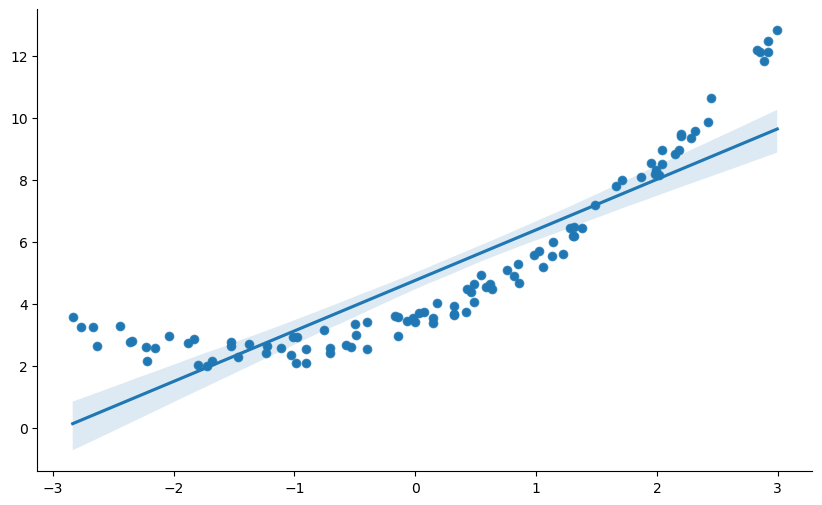

In [3]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(x = x[0:,0 ], y = y[0:, 0])
sns.regplot(x = x[0:,0 ], y = y[0:, 0])
sns.despine()

In [4]:
x = pd.DataFrame(x)

In [5]:
preprocessing = ColumnTransformer([
    ('Polynomial_transfor', PolynomialFeatures(degree=2, include_bias=True),[0])
])

In [6]:
# preprocessing.fit_transform(x)

In [7]:
traning_pipeline = Pipeline([
    ('preprocessing', preprocessing),
 
   ( 'model', LinearRegression())
])

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [9]:
traning_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('Polynomial_transfor',
                                                  PolynomialFeatures(),
                                                  [0])])),
                ('model', LinearRegression())])

In [10]:
x_train.shape

(75, 1)

In [11]:
traning_pipeline.predict(x_train)[0:,0].shape

(75,)

In [12]:
traning_pipeline.predict(x_train)[0:,0]

array([ 2.83435223,  4.28472156,  9.7056512 ,  9.27777066,  5.8521287 ,
        4.34265719,  2.69642187,  2.39378433,  2.81313695, 12.25591231,
        5.44604056, 10.12525158,  7.39449791, 11.8492527 ,  2.49464935,
       12.23387763,  4.92215256,  2.64267929,  2.42075086,  8.3627387 ,
        8.47030758,  5.14974751,  7.55055057,  5.12155093,  6.32483285,
        9.07600981,  6.24090702,  8.51363536,  8.08159745,  2.41953712,
        2.89297788,  2.55027821,  2.86883207,  8.6072985 ,  5.56634082,
        4.20867347,  2.6488399 ,  6.34301606,  6.53262378,  4.64815136,
       11.93353834,  9.26986359,  8.7012054 ,  3.45857355,  3.27268495,
        2.39639679,  4.01513602,  3.48409371,  6.34405596,  4.6111591 ,
        3.71217313,  6.85855936,  2.79735513,  3.10525736,  5.06172844,
        2.56796135, 12.08018127,  2.48622687,  3.59326143,  2.97179482,
        6.0774864 ,  4.45444607,  3.25117156,  8.70142932,  3.27752122,
        2.45594792,  3.27979385,  3.76879217,  2.79306467,  3.70

In [16]:
x_train

,0
33,-0.530813
52,0.460610
59,2.312820
78,2.200885
95,1.135950
...,...
1,-1.025455
80,0.032823
97,-1.800010
19,0.321910


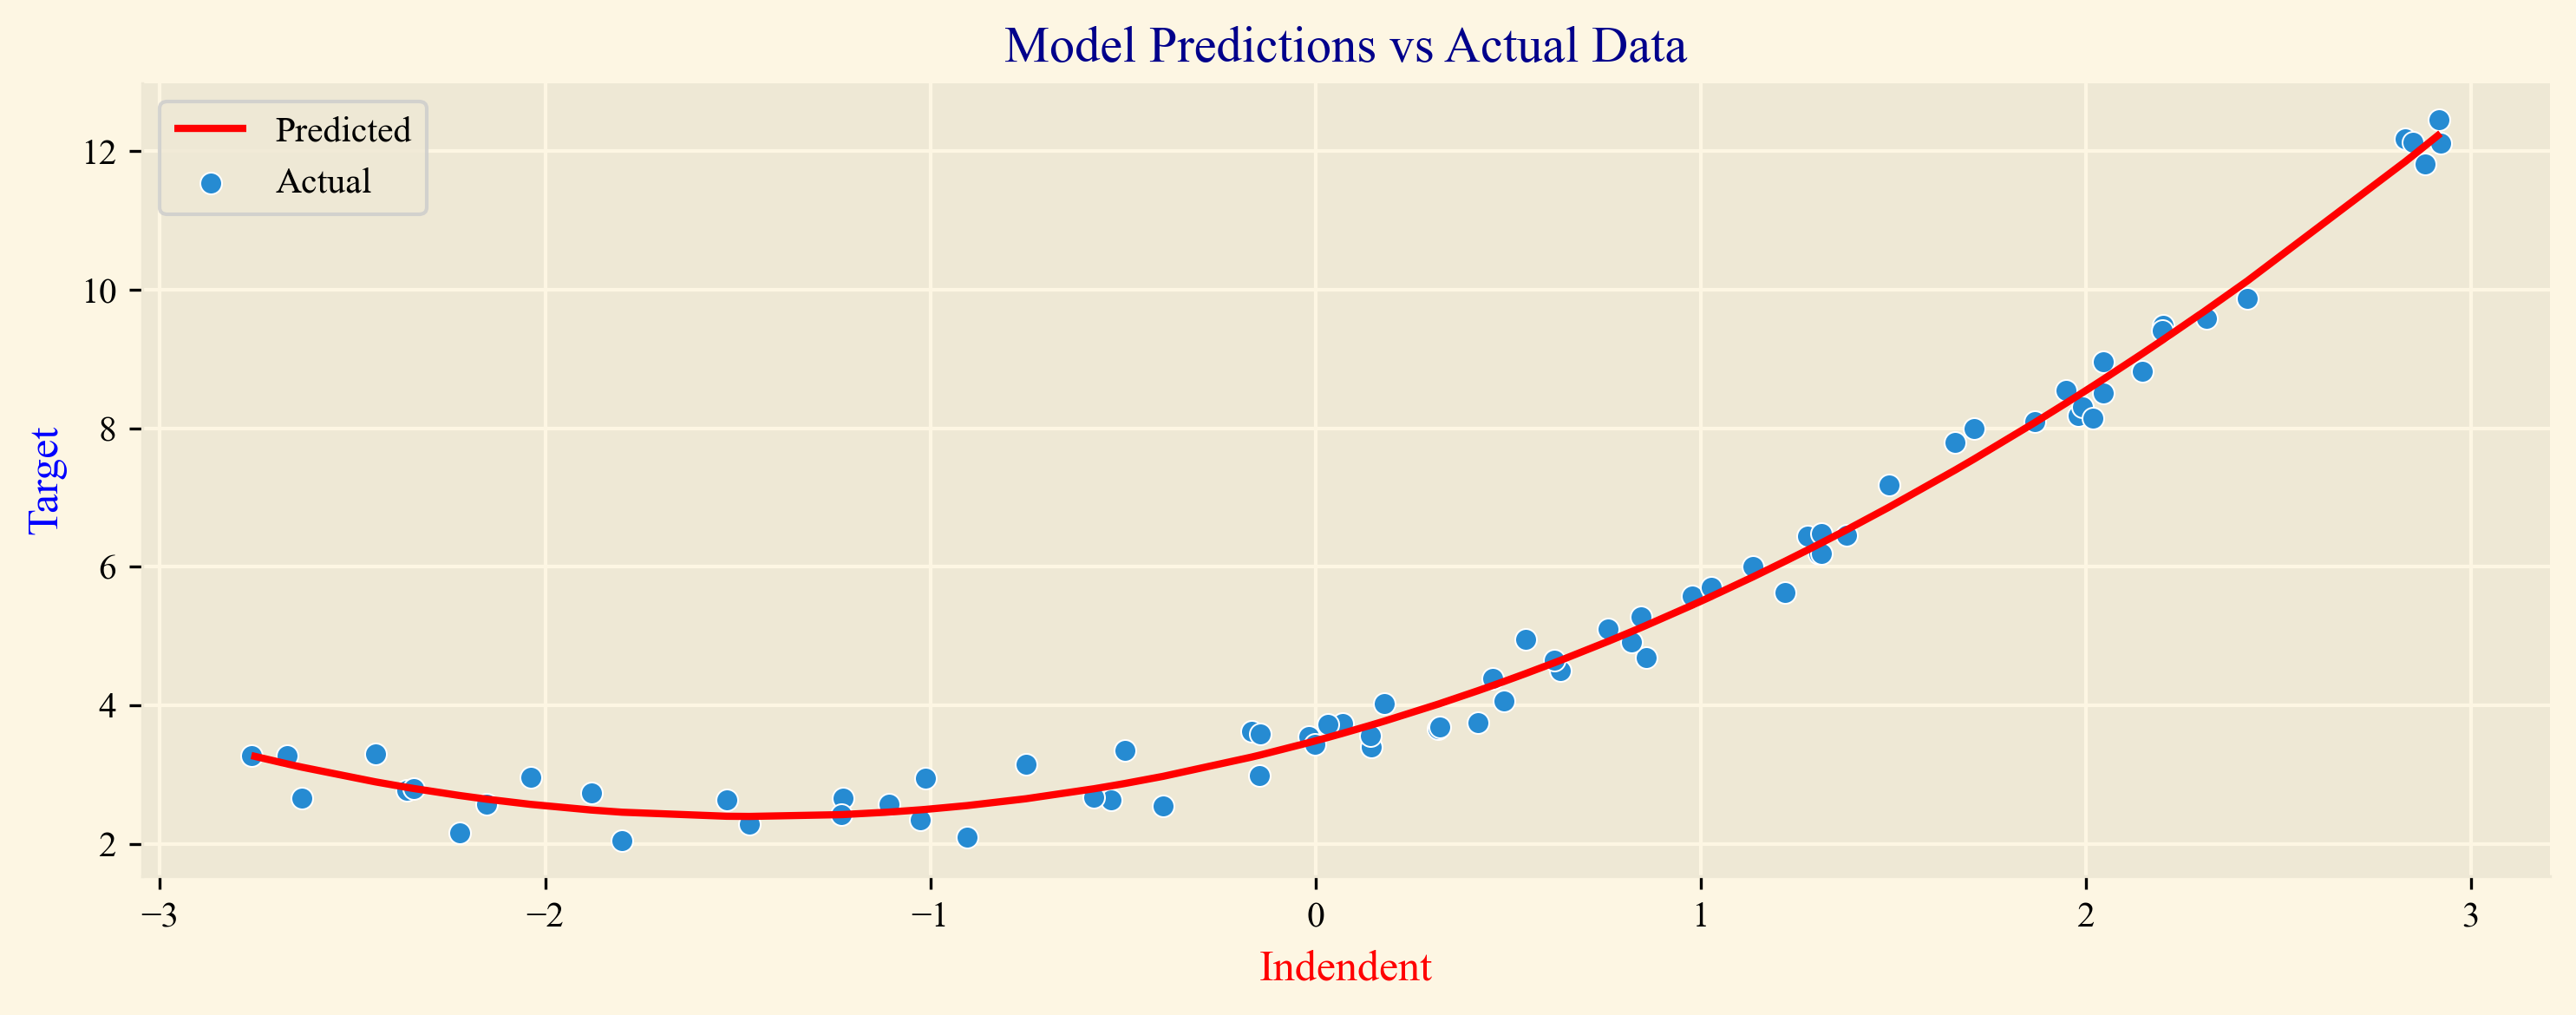

In [20]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
plt.style.use('Solarize_Light2')

plt.rc('font', family='Times New Roman')
sns.lineplot(x=x_train[0], y=traning_pipeline.predict(x_train)[0:,0], color='r', ax=ax, label='Predicted')
sns.scatterplot(x=x_train[0],  y=y_train[0:, 0],  ax=ax, label='Actual')
ax.set_title('Model Predictions vs Actual Data', fontsize=14)
ax.set_xlabel('Indendent', fontsize=12)
ax.set_ylabel('Target', fontsize=12)
ax.legend()
plt.tight_layout()
sns.despine()
ax.xaxis.label.set_color('r')  # X-axis label color
ax.yaxis.label.set_color('b')  # Y-axis label color
ax.title.set_color('darkblue')  # Title color
ax.tick_params(colors='black')  # Tick color
plt.show()

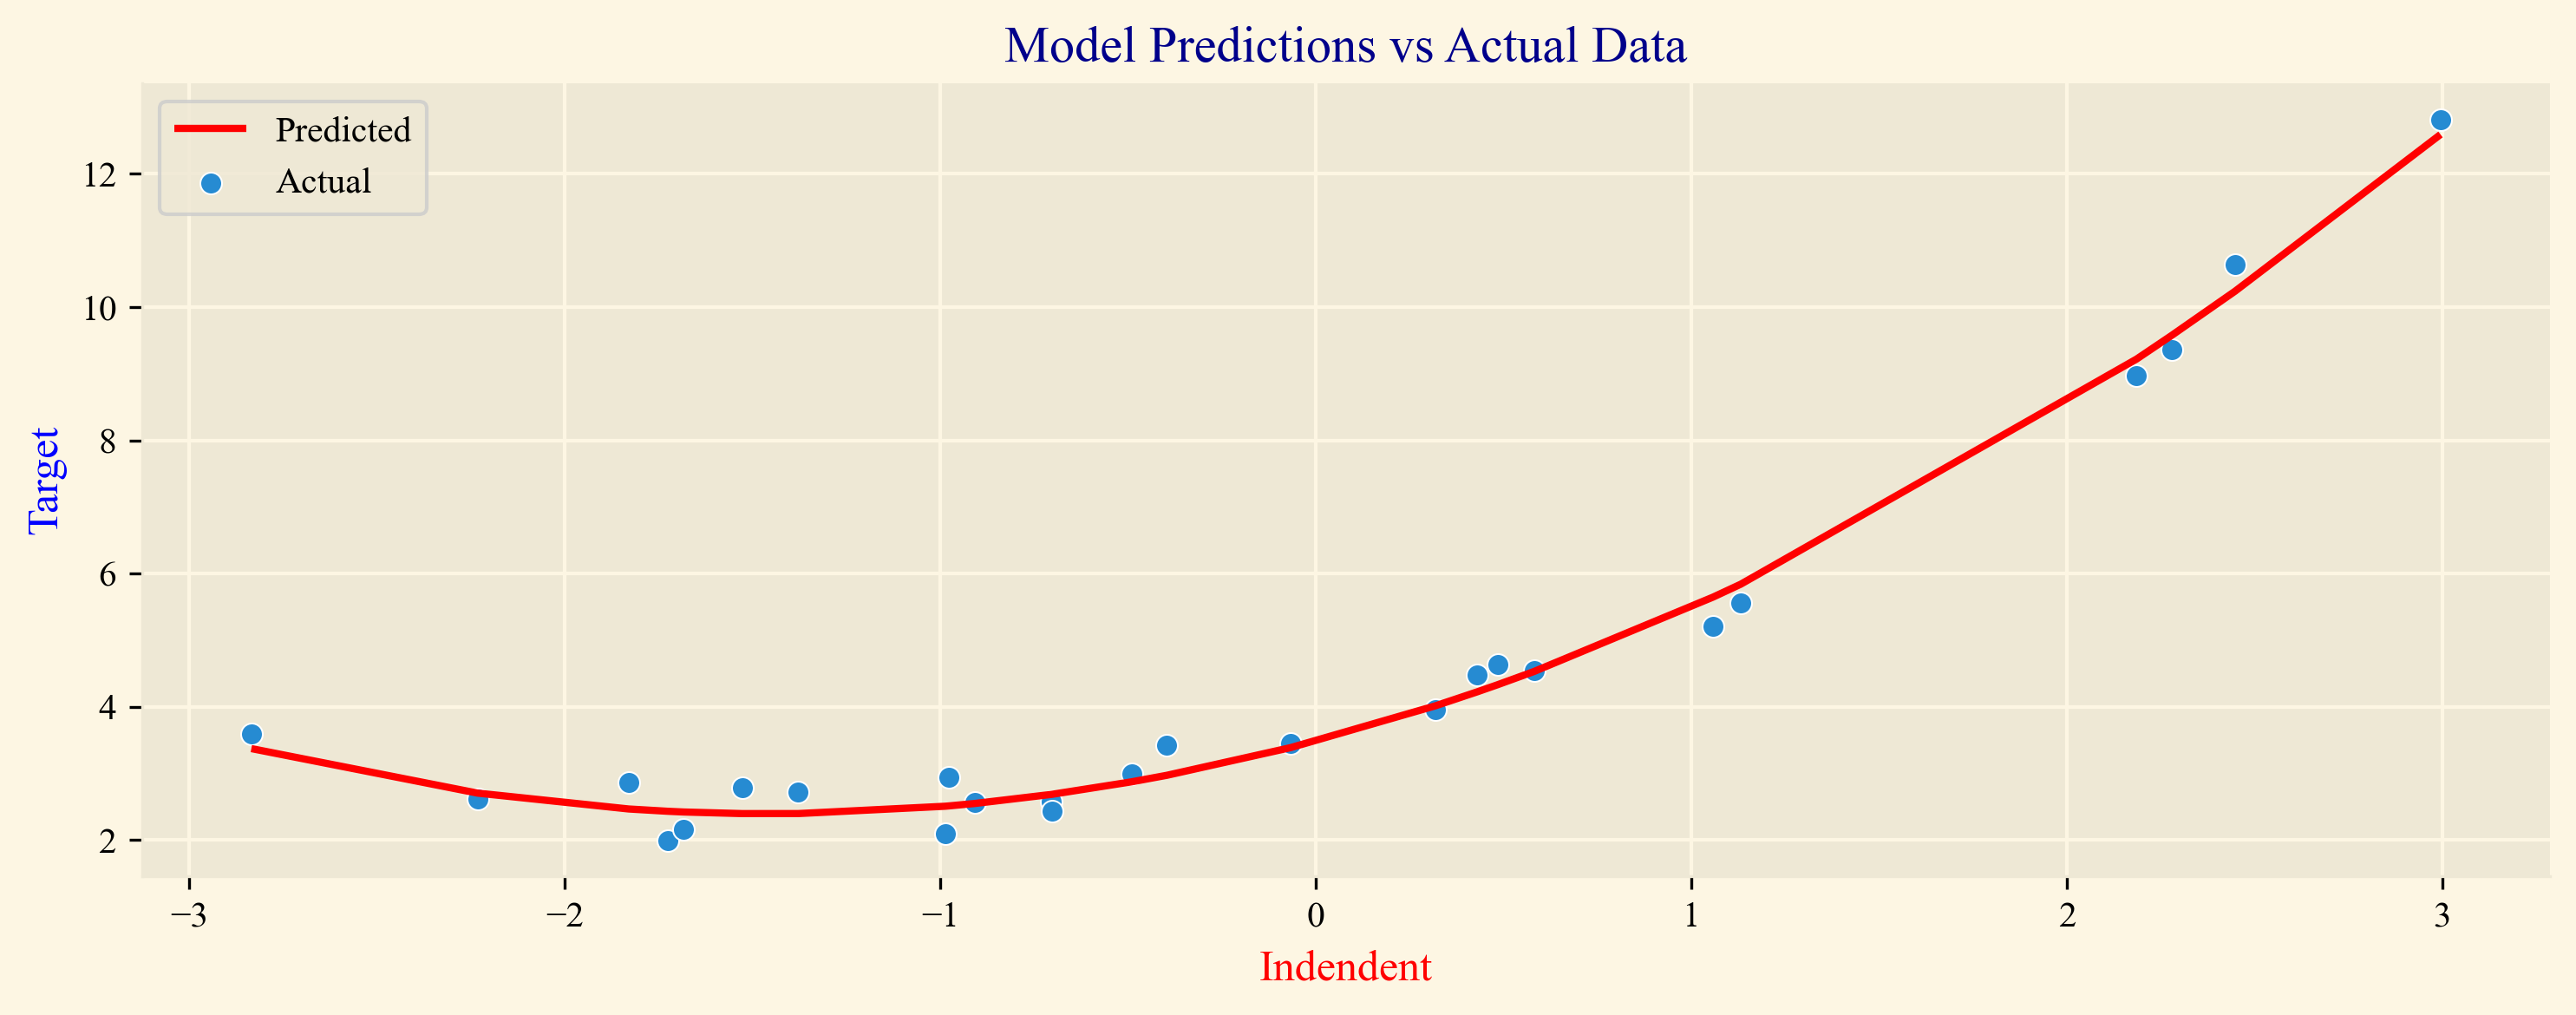

In [24]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
plt.style.use('Solarize_Light2', )

plt.rc('font', family='Times New Roman')
sns.lineplot(x=x_test[0], y=traning_pipeline.predict(x_test)[0:,0], color='r', ax=ax, label='Predicted')
sns.scatterplot(x=x_test[0],  y=y_test[0:, 0],  ax=ax, label='Actual')
ax.set_title('Model Predictions vs Actual Data', fontsize=14)
ax.set_xlabel('Indendent', fontsize=12)
ax.set_ylabel('Target', fontsize=12)
ax.legend()
plt.tight_layout()
sns.despine()
ax.xaxis.label.set_color('r')  # X-axis label color
ax.yaxis.label.set_color('b')  # Y-axis label color
ax.title.set_color('darkblue')  # Title color
ax.tick_params(colors='black')  # Tick color
plt.show()